In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.distributions as tdist

## Testing cells

In [2]:
from lstm import RNNCell
rnn = RNNCell(512, 2, 256)

# Random toy data
inputs = torch.randn(3,5,512)
hidden = torch.randn(1, 5, 256)
o, h = rnn(inputs, hidden)

In [3]:
print(inputs.shape)
print(o.shape)
print(hidden.shape)

torch.Size([3, 5, 512])
torch.Size([3, 5, 2])
torch.Size([1, 5, 256])


In [4]:
from lstm import LSTMCell

# LSTM without Output cell and Xavier initialization

lstm = LSTMCell(512, 256)
batch = 2
inputs = torch.randn(3, batch, 512)
hidden = torch.randn(1, batch, 256)
state = torch.randn(256)
output, (new_state, h) = lstm(inputs[0].unsqueeze(0), hidden, state)

In [5]:
print(inputs[0].unsqueeze(0).shape)
print(new_state.shape)
print(h.shape)

torch.Size([1, 2, 512])
torch.Size([1, 2, 256])
torch.Size([1, 2, 256])


In [6]:
# LSTM with Xavier initialization

lstm = LSTMCell(512, 256, True)
batch = 5
inputs = torch.randn(3, batch, 512)
hidden = torch.randn(1, batch, 256)
state = torch.randn(256)

In [7]:
o, (new_state, h) = lstm(inputs[0].unsqueeze(0), hidden, state)
print(o.shape)
print(h.shape)
print(new_state.shape)

torch.Size([1, 5, 256])
torch.Size([1, 5, 256])
torch.Size([1, 5, 256])


In [8]:
# print(torch.argmax(o, dim=2))
# gt = (torch.ones(batch).long() - torch.argmax(o, dim=2)[0].long())
# print(gt)

In [9]:
# loss_criterion = nn.CrossEntropyLoss()

# optimizer = torch.optim.Adam(lstm.parameters(), lr=0.001)
# optimizer.zero_grad()

# loss = loss_criterion(o.view(batch, -1), gt)
# print("Loss: {}".format(loss.item()))
# loss.backward()

# optimizer.step()

### Full LSTM Architecture

In [0]:
# class LSTM(nn.Module):
#     """Creates an LSTM network       
    
#     An LSTM architecture which takes the number of LSTM cells to
#     arrange to create a history. Each cell is sequentially connected 
#     and sequence of inputs are fed in each pass with a shift of one.
#     Till the last position in the sequence is read by the last LSTM
#     cell in the architecture sequence.
#     In case of a Bidirectional LSTM, the similar thing happens but 
#     the input is read right to left. The output is obtained on the 
#     last LSTM cell which reads the first position in the sequence.
    
#     Parameters
#     ==========
#     ncell: Number of LSTM cells to arrange sequentially (or history length)
#     input_dim: Dimension of input data
#     hidden_dim: Size of hidden state
#     output_dim: Dimension of outputs for each input
#     bidirectional: True/False indicacting to create bidirectional LSTM
#     """
    
#     def __init__(self, ncell, input_dim, hidden_dim, output_dim, 
#                  bidirectional=False, xavier_init=True):
#         super().__init__()
#         self.bidirectional = bidirectional
#         self.hidden_dim = hidden_dim
#         # Creating architecture for Left-to-Right Sequence
#         archi = []
#         for i in range(ncell):
#             archi.append(LSTMCell(input_dim, hidden_dim, 
#                                   None, xavier_init))
#         self.archi = nn.ModuleList(archi)
#         self.final_layer = nn.Linear(hidden_dim, output_dim)
#         self.softmax = nn.Softmax(dim=2) # use nn.LogSoftmax?
        
#         if bidirectional:
#             # Creating architecture for Right-to-Left Sequence
#             archi_rev = []
#             for i in range(ncell):
#                 archi_rev.append(LSTMCell(input_dim, hidden_dim, 
#                                           None, xavier_init))
#             self.archi_rev = nn.ModuleList(archi_rev)
#             self.final_layer = nn.Linear(2 * hidden_dim, output_dim)               
        
#     def forward(self, x, hidden_state, cell_state):
#         history = len(self.archi)
#         seq_length = x.shape[0]
#         hidden_state_rev = hidden_state.clone()
#         cell_state_rev = cell_state.clone()
#         assert(seq_length >= history)
#         # Forward pass for Left-to-Right sequence
#         for i in range(seq_length - history + 1):
#             for j in range(history):
#                 inputs = x[i+j].unsqueeze(0)
#                 cell_state, hidden_state, _ = self.archi[j](inputs, 
#                                                             hidden_state, 
#                                                             cell_state)
#         if self.bidirectional:
#             # Forward pass for Right-to-Left sequence
#             for i in range(seq_length - history + 1):
#                 for j in range(history):
#                     inputs = x[i+j].unsqueeze(0)
#                     cell_state_rev, 
#                     hidden_state_rev,
#                     _ = self.archi_rev[history-j-1](inputs, hidden_state_rev, cell_state_rev)
#             hidden_state = torch.cat((hidden_state, hidden_state_rev), dim=-1)
        
#         output = self.softmax(self.final_layer(hidden_state))
#         return cell_state, hidden_state, output
    
#     def count_parameters(self):
#         return sum(p.numel() for p in self.parameters() if p.requires_grad)

In [0]:
# history = 4
# seq_length = 10
# for i in range(seq_length - history + 1):
#     for j in range(history):
#         print(i+j, end=" ")
#     print()
# print()
# archi = ["archi_1", "archi_2", "archi_3", "archi_4"]
# for i in range(0, seq_length - history + 1)[::-1]:
#     for j in range(history)[::-1]:
#         print(i+j, end=" ")
#         #print("{} {}".format(history-j-1, i+j), end="\t")
#     print()

### Training modules

In [0]:
# def train(model, data_loader, batch_size, optimizer, epochs, validate=False):
#     """
#     Trains the model of class LSTM using data from data_loader passed as argument
    
#     Parameters
#     ==========
#     model: object of class LSTM
#     data_loader: an object containing data and functions to sample batches
#         The sample() function of the object returns two tensors
#         x - which is a 3D tensor of [sequence, batch, dim]
#             Example-A batch of 10 sentences of 5 words each where each word has
#             an embedding vector of size 256, the 3D tensor shape will be [5, 10, 256]
#         y - a 1D tensor of length batch_size containing the classes as integers (torch.long())
#         The valid_data() function of the object returns a tuple of two tensors
#         x - which is a 3D tensor of [sequence, valid_data_len, dim]
#         y - a 1D tensor of length valid_data_len containing the classes as integers (torch.long())
    
#     Returns
#     =======
#     Trained model object of class LSTM, list containing loss progress
#     (, and list containing validation F1 score)
    
#     """
#     loss_list = []
#     val_acc = []
#     for i in range(epochs):
#         loss_tracker = []
#         for i, x, y in enumerate(data_loader.sample_batch(batch_size)):
#             hidden_state = torch.zeros(1, batch_size, model.hidden_dim)
#             cell_state = torch.zeros(1, batch_size, model.hidden_dim)
#             cell_state, hidden_state, output = lstm(x=x_train, 
#                                                     hidden_state=hidden_state, 
#                                                     cell_state=cell_state)
#             loss = loss_criterion(output.view(batch_size, -1), y_train.long())
#             print("Epoch #{}: Batch {}/{} -- Loss = {}".format(i+1, j+1, int(x_size/batch_size), 
#                                                                loss.item()), end='\r')
#             loss_tracker.append(loss.item())
#             # backward pass for the batch (+ weight updates)
#             loss = loss_criterion(output.view(batch_size, -1), y_train.long())
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()
#         print()
#         print("Epoch #{}: Average loss is {}".format(i+1, loss_list[-1]))
#         if validate:
#             f1 = evaluate(model, data_loader.valid_data(), verbose=True)
#             val_acc.append(f1)
#             print("Epoch #{}: Validation accuracy is {}".format(i+1, val_acc[-1]))
#         loss_list.append(np.mean(loss_tracker))
#         loss_tracker = []
#         val_acc = []
#         print()
#     if validate:
#         return model, loss_list, val_acc
#     return model, loss_list

In [0]:
# from sklearn.metrics import confusion_matrix, f1_score

# def evaluate(model, test_data, verbose=True):
#     """
#     Evaluates the model of class LSTM using test data passed
    
#     Parameters
#     ==========
#     model: object of class LSTM
#     test_data: a tuple containing (x, y) 
#         x - a 3D tensor of [sequence, len_test_data, dim]
#             Example-A batch of 10 sentences of 5 words each where each word has
#             an embedding vector of size 256, the 3D tensor shape will be [5, 10, 256]
#         y - a 1D tensor containing the classes as integers (torch.long())
#     verbose: prints the confusion matrix and F-score
    
#     Returns
#     =======
#     F-score (float)
    
#     """
#     x, y = test_data
#     batch_size = x.shape[1]
#     hidden_state = torch.zeros(1, batch_size, model.hidden_dim)
#     cell_state = torch.zeros(1, batch_size, model.hidden_dim)
#     model.eval()
#     with torch.no_grad():
#         _, _, output = lstm(x=x_train, hidden_state=hidden_state, cell_state=cell_state)   
#     if verbose:
#         print(confusion_matrix(y, torch.argmax(output, 2)[0].numpy()))
#         print(f1_score(y, torch.argmax(output, 2)[0].numpy()))
#     return f1_score(y, torch.argmax(output, 2)[0].numpy())

## Creating datasets

### Counting sequence

In [0]:
# x = torch.randint(0, 2, (1000,100)).float()
# y = torch.sum(x, 1)

In [0]:
# input_dim = 1
# seq_length = 100
# hidden_dim = 50
# output_dim = 100
# lstm = LSTMCell(input_dim=input_dim, hidden_dim=hidden_dim, 
#                 output_dim=output_dim, xavier_init=True)
# optimizer = optim.Adam(lstm.parameters(), lr=0.001)
# loss_criterion = nn.CrossEntropyLoss()

In [0]:
# # Training Loop
# batch_size = 10
# # for i in range(10):
# for j in range(int(1000/batch_size)):
#     start = j * batch_size
#     end = min((j+1) * batch_size, 1000)
#     x_train = torch.tensor([]).float()
#     y_train = y[start:end]
#     # creating the 3D tensor for the batch: seq x batch x dim
#     for data in x[start:end]:
#         x_train = torch.cat((x_train, data.view(seq_length, 1, 1)), dim=1)
#     # initializing states
#     hidden_state = torch.zeros(1, batch_size, hidden_dim)
#     cell_state = torch.zeros(1, batch_size, hidden_dim)
#     # forward pass for the batch
#     for i, seq_i in enumerate(x_train):        
#         cell_state, hidden_state, output = lstm(x=seq_i.unsqueeze(0), 
#                                                 hidden_state=hidden_state, 
#                                                 old_state=cell_state)
#     loss = loss_criterion(output.view(batch_size, -1), y_train.long())
#     print("Epoch #{}: Batch {}/{} -- Loss = {}".format(i+1, j+1, int(1000/batch_size), 
#                                                        loss.item()), end='\r')
#     # backward pass for the batch (+ weight updates)
#     loss = loss_criterion(output.view(batch_size, -1), y_train.long())
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

In [0]:
# print(torch.argmax(output, dim=2))

tensor([[51, 51, 51, 51, 51, 51, 51, 51, 51, 51]])


### Classifying product as positive/negative

In [0]:
# input_dim = 1
# seq_length = 10
# hidden_dim = 50
# output_dim = 2
# x_size = 1000

# x = torch.randn((x_size, seq_length)).float()
# y = torch.prod(x, 1)
# y[y >= 0] = 1
# y[y < 0] = 0
# # print(torch.histc(y, bins=2))

# lstm = LSTM(ncell=4, input_dim=input_dim, hidden_dim=hidden_dim, 
#             output_dim=output_dim, bidirectional=False, xavier_init=True)
# optimizer = optim.Adam(lstm.parameters(), lr=0.001)
# loss_criterion = nn.CrossEntropyLoss()
# print(lstm.count_parameters())

41702


In [0]:
# Testing of batch creating and forward pass

# x_train = x
# y_train = y

# batch_size = 4
# j = 0
# start = j * batch_size
# end = min((j+1) * batch_size, 1000)

# x_train = torch.tensor([]).float()
# y_train = y[start:end]
# # creating the 3D tensor for the batch: seq x batch x dim
# for data in x[start:end]:
#     x_train = torch.cat((x_train, data.view(seq_length, 1, 1)), dim=1)

# # initializing states
# hidden_state = torch.zeros(1, batch_size, hidden_dim)
# cell_state = torch.zeros(1, batch_size, hidden_dim)

# print(x_train.shape, y_train.shape)
# print(hidden_state.shape, cell_state.shape)

# s,h,o = lstm(x_train, hidden_state, cell_state)

In [0]:
# # TRAINING LOOP

# # Each batch passed to LSTM() is expected to be a 3D Tensor where
# # the dimensions describe [sequence_size, batch_size, dim_size]

# batch_size = 4

# for i in range(10):
#     loss_tracker = []
#     for j in range(int(x_size/batch_size)):
#         start = j * batch_size
#         end = min((j+1) * batch_size, x_size)
#         x_train = torch.tensor([]).float()
#         y_train = y[start:end]
#         # creating the 3D tensor for the batch: seq x batch x dim
#         for data in x[start:end]:
#             x_train = torch.cat((x_train, data.view(seq_length, 1, 1)), dim=1)
#         # initializing states
#         hidden_state = torch.zeros(1, batch_size, hidden_dim)
#         cell_state = torch.zeros(1, batch_size, hidden_dim)
#         cell_state, hidden_state, output = lstm(x=x_train, 
#                                                 hidden_state=hidden_state, 
#                                                 cell_state=cell_state)
#         loss = loss_criterion(output.view(batch_size, -1), y_train.long())
#         print("Epoch #{}: Batch {}/{} -- Loss = {}".format(i+1, j+1, int(x_size/batch_size), 
#                                                            loss.item()), end='\r')
#         loss_tracker.append(loss.item())
#         # backward pass for the batch (+ weight updates)
#         loss = loss_criterion(output.view(batch_size, -1), y_train.long())
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#     print("\nEpoch #{}: Average loss is {}".format(i+1, np.mean(loss_tracker)))
#     loss_tracker = []
#     print()

Epoch #1: Batch 250/250 -- Loss = 0.7007292509078984
Epoch #1: Average loss is 0.694420922756195

Epoch #2: Batch 250/250 -- Loss = 0.7049501538276672
Epoch #2: Average loss is 0.6934642205238343

Epoch #3: Batch 250/250 -- Loss = 0.7077709436416626
Epoch #3: Average loss is 0.6930509006977081

Epoch #4: Batch 250/250 -- Loss = 0.7110102176666261
Epoch #4: Average loss is 0.6925781621932984

Epoch #5: Batch 250/250 -- Loss = 0.7147052884101868
Epoch #5: Average loss is 0.6917244708538055

Epoch #6: Batch 250/250 -- Loss = 0.7159007191658026
Epoch #6: Average loss is 0.6891825330257416

Epoch #7: Batch 250/250 -- Loss = 0.6925382018089294
Epoch #7: Average loss is 0.6872168350219726

Epoch #8: Batch 250/250 -- Loss = 0.6890038251876831
Epoch #8: Average loss is 0.6850257174968719

Epoch #9: Batch 250/250 -- Loss = 0.6967091560363772
Epoch #9: Average loss is 0.683526422739029

Epoch #10: Batch 250/250 -- Loss = 0.6947144865989685
Epoch #10: Average loss is 0.6801455161571502



In [0]:
# validate(lstm, x_train)

In [0]:
# # Validating on entire generated data

# x_train = torch.tensor([]).float()
# y_train = y
# # creating the 3D tensor for the batch: seq x batch x dim
# for data in x:
#     x_train = torch.cat((x_train, data.view(seq_length, 1, 1)), dim=1)
# print(x_train.shape)
# print(y_train.shape)

# evaluate(lstm, (x_train, y_train))

torch.Size([10, 1000, 1])
torch.Size([1000])
[[291 198]
 [213 298]]
0.5918570009930486


0.5918570009930486

In [0]:
# # Validating on newly generated test data

# x_test = torch.randn((x_size, seq_length)).float()
# y_test = torch.prod(x_test, 1)
# y_test[y_test >= 0] = 1
# y_test[y_test < 0] = 0

# x_train = torch.tensor([]).float()
# y_train = y_test
# # creating the 3D tensor for the batch: seq x batch x dim
# for data in x_test:
#     x_train = torch.cat((x_train, data.view(seq_length, 1, 1)), dim=1)
# print(x_train.shape)
# print(y.shape)

# evaluate(lstm, (x_train, y_train))

torch.Size([10, 1000, 1])
torch.Size([1000])
[[263 251]
 [251 235]]
0.4835390946502058


0.4835390946502058

### IMDB

In [0]:
# @InProceedings{maas-EtAl:2011:ACL-HLT2011,
#   author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
#   title     = {Learning Word Vectors for Sentiment Analysis},
#   booktitle = {Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies},
#   month     = {June},
#   year      = {2011},
#   address   = {Portland, Oregon, USA},
#   publisher = {Association for Computational Linguistics},
#   pages     = {142--150},
#   url       = {http://www.aclweb.org/anthology/P11-1015}
# }

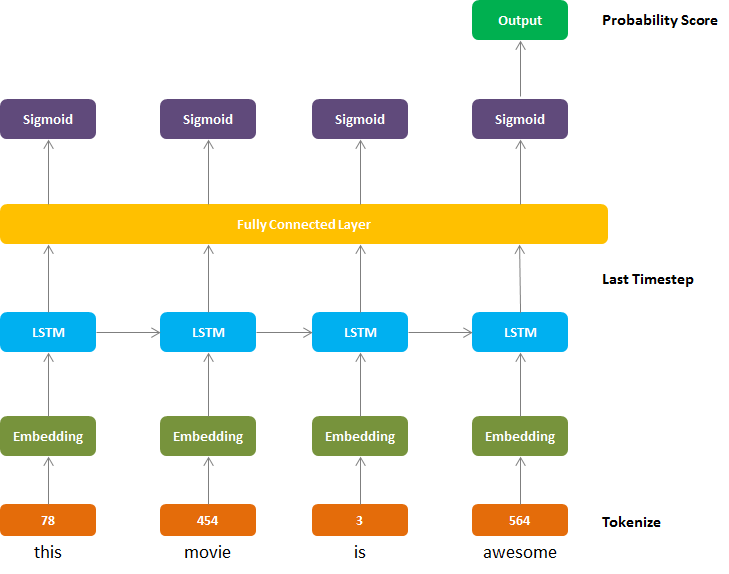

In [0]:
# from IPython.display import Image
# Image(filename='../img/sentiment.png') 
# # source:(https://towardsdatascience.com/sentiment-analysis-using-lstm-step-by-step-50d074f09948)

In [1]:
# from torchtext.datasets import IMDB
# from torchtext import data
# from torchtext.vocab import GloVe

# from sklearn.metrics import confusion_matrix, f1_score, classification_report

# seed = 42

In [16]:
# import torch
# batch_size = 10
# hidden_dim = 256
# layers = 4
# hidden_state = torch.zeros(1, batch_size, hidden_dim, requires_grad=True)
# hiddens1 = torch.cat(tuple(hidden_state.clone() for i in range(layers)), dim=0)
# hiddens2 = torch.cat(tuple(hidden_state.clone() for i in range(layers)), dim=0)
# print(hiddens1.shape)
# print(hiddens2.shape)
# hiddens1 = hiddens1[-1].unsqueeze(0)
# hiddens2 = hiddens2[-1].unsqueeze(0)
# hiddens = torch.cat((hiddens1, hiddens2), dim=0)
# print(hiddens.shape)

In [14]:
# temp = torch.cat((hiddens[0], hiddens[1]), dim=1)
# print(hiddens.shape)
# # temp = hiddens.view(1, hiddens.shape[1], 2*hiddens.shape[2])
# print(temp.requires_grad)
# # print(temp[0,:,:256].shape, hiddens[0].shape)
# # print(torch.sum(temp[0,:,:256] == hiddens[0]))
# # print(torch.sum(temp[0,:,:256] == hiddens[1]))
# print(torch.sum(temp[:,:256] == hiddens[0]))
# print(torch.sum(temp[:,256:] == hiddens[1]))

In [15]:
# output = torch.tensor([]).float()
# for i in range(20):
#     output = torch.cat((output, hiddens1[-1].unsqueeze(0)), dim=0)
# print(output.shape)
# output_rev = torch.tensor([]).float()
# for i in range(20):
#     output_rev = torch.cat((output_rev, hiddens2[-1].unsqueeze(0)), dim=0)
# print(output_rev.shape)
# output = torch.cat((output, output_rev), dim=2)
# print(output.shape)

In [13]:
# from sentiment_analysis import LSTM_sentiment
# model = LSTM_sentiment(300, 256, 2, 5, True, True)

#### pre-processing - tokenization & loaders

In [4]:
# ## create field - tokenize text & create label classes
# TEXT = data.Field(tokenize = 'spacy')
# LABEL = data.LabelField(dtype = torch.float)

# # load dataset
# train_data, test_data = IMDB.splits(TEXT, LABEL)

In [5]:
# # split training into train & validation
# train_data, valid_data = train_data.split(split_ratio=0.8, random_state = np.random.seed(seed))

# print('Training data size:   ', len(train_data))
# print('Validation data size: ', len(valid_data))
# print('Test data size:       ', len(test_data))

Training data size:    20000
Validation data size:  5000
Test data size:        25000


In [1]:
from imdb import IMDB_dataset
imdb = IMDB_dataset()
imdb.load()

In [2]:
train_iterator, valid_iterator, test_iterator = imdb.create_data_loader()

In [8]:
for j, batch in enumerate(train_iterator):
    pass

In [9]:
batch.text

tensor([[ 886,   11,  111,  ...,   66,  160, 4025],
        [  78,  171,  417,  ...,   22, 2937,  640],
        [  46,    5,  156,  ...,    3, 1263,    3],
        ...,
        [   1,    1,    1,  ...,    1,    1,    1],
        [   1,    1,    1,  ...,    1,    1,    1],
        [   1,    1,    1,  ...,    1,    1,    1]], device='cuda:0')

In [15]:
import torch
import torch.nn as nn
from sentiment_analysis import LSTM_sentiment

batch_size = 64
input_dim = 10
hidden_dim = 16
# x = torch.randn(50, batch_size, 300)
hidden_state = torch.zeros(1, batch_size, hidden_dim, requires_grad=True)
cell_state = torch.zeros(1, batch_size, hidden_dim, requires_grad=True)
# o = model(x, hidden_state, cell_state)

In [16]:
# hidden_state = torch.zeros(1, batch.label.shape[0], hidden_dim)
# cell_state = torch.zeros(1, batch.label.shape[0], hidden_dim)
print(hidden_state.shape, cell_state.shape)
# print(batch.text.shape)

torch.Size([1, 64, 16]) torch.Size([1, 64, 16])


In [17]:
n_input = len(imdb.TEXT.vocab)
n_embed = input_dim
embedding = nn.Embedding(n_input, n_embed)
embedding.weight.requires_grad = False

model = LSTM_sentiment(input_dim=n_embed, 
                      hidden_dim=hidden_dim, output_dim=1, 
                      layers=1, bidirectional=True, xavier_init=True)

In [18]:
# embedding(batch.text)
o = model(embedding(batch.text.to("cpu")), hidden_state, cell_state)

KeyboardInterrupt: 

In [4]:
# import torch
# import torch.nn as nn
# from sentiment_analysis import LSTM_sentiment
# model = LSTM_sentiment(input_dim=300, 
#                       hidden_dim=256, output_dim=1, 
#                       layers=1, bidirectional=True, xavier_init=True)

# batch_size = 64
# x = torch.randn(50, batch_size, 300)
# hidden_state = torch.randn(1, batch_size, 256, requires_grad=True)
# cell_state = torch.randn(1, batch_size, 256, requires_grad=True)
# o = model(x, hidden_state, cell_state)

In [5]:
# print(model.count_parameters())
# o.shape

In [4]:
# import random
# random.seed(42)
# random.getstate()

In [5]:
# ## build vocabulary - using top n words
# # we do not want to remove stop words & punctuations though (since it removes context)
# MAX_VOCAB_SIZE = 25000

# # TEXT.build_vocab(train_data, max_size=MAX_VOCAB_SIZE)
# # LABEL.build_vocab(train_data)

In [6]:
# TEXT.build_vocab(train_data, max_size=MAX_VOCAB_SIZE, vectors=GloVe(name='6B', dim=300))
# LABEL.build_vocab(train_data)

In [7]:
# ## creating loader
# # data loader equivalent in torchtext batch iterator - buckets similar lengths together
# batch_size = 64

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
#     (train_data, valid_data, test_data), 
#     batch_size = batch_size,
#     device = device)

#### model implementation 

In [0]:
# ## Sentiment Analysis network
# class SentimentNetwork(nn.Module):
    
#     def __init__(self, n_input, n_embed, n_hidden, n_output, pretrained_vec=None):
#         super().__init__()
        
#         self.hidden_dim = n_hidden
        
#         self.embedding = nn.Embedding(n_input, n_embed)
#         if pretrained_vec is not None:
#             self.embedding.weight.data.copy_(pretrained_vec)
#             self.embedding.weight.requires_grad = False
            
#         self.lstm = LSTM(ncell=1, input_dim=n_embed, hidden_dim=n_hidden, 
#                          output_dim=None, bidirectional=False, xavier_init=True)
#         self.fc = nn.Linear(n_hidden, n_output)
        
#     def forward(self, x, h, c):
#         embed = self.embedding(x)
#         output, c = self.lstm(embed, h, c)
#         # getting latest hidden layer (for next iteration)
#         h = output[:,:,-1:]
#         y = self.fc(h)
#         return y, h, c
      
# ## Sentiment Analysis network - using PyTorch LSTM module
# class SentimentNetworkBaseline(nn.Module):
    
#     def __init__(self, n_input, n_embed, n_hidden, n_output, pretrained_vec=None):
#         super().__init__()
        
#         self.hidden_dim = n_hidden
        
#         self.embedding = nn.Embedding(n_input, n_embed)
#         # not training embedding layer if pretrained embedding is provided
#         if pretrained_vec is not None:
#             self.embedding.weight.data.copy_(pretrained_vec)
#             self.embedding.weight.requires_grad = False
            
#         self.lstm = nn.LSTM(n_embed, n_hidden)
#         self.fc = nn.Linear(n_hidden, n_output)
        
#     def forward(self, x, h, c):
#         embed = self.embedding(x)
#         output, (h, c) = self.lstm(embed, (h, c))
#         y = self.fc(h.squeeze(0))
#         return y, h, c

In [0]:
# def train_sentiment(model, train_loader, device, epochs, optimizer, loss_criterion, valid_loader=None):
#     """
#     Trains the model of class LSTM using data from data_loader passed as argument
    
#     Parameters
#     ==========
#     model: object of class torch.nn.Module
#     train_loader: an object of class BucketIterator containing training data
#         The next() function of the object returns a batch object, which has 2 members
#         text   - which is a 3D tensor of [sequence, batch, dim]
#             Example-A batch of 10 sentences of 5 words each where each word has
#             an embedding vector of size 256, the 3D tensor shape will be [5, 10, 256]
#         labels - a 1D tensor of length batch_size containing the classes as integers (torch.long())
#     valid_loader: Optional parameter, an object of class BucketIterator containing validation data.
#         Similar to train_loader
#         If passed, then it validates with the given data
#     Returns
#     =======
#     Trained model object of class LSTM, list containing loss progress
#     (, and list containing validation F1 score)
    
#     """
    
#     stats = {'loss': [], 'score': []}
#     for i in range(epochs):
#         loss_tracker = []
        
#         model.train()
#         for j, batch in enumerate(train_loader):
          
#             # generate initial hidden & cell states
#             hidden_state = torch.zeros(1, batch.label.shape[0], model.hidden_dim).to(device)
#             cell_state = torch.zeros(1, batch.label.shape[0], model.hidden_dim).to(device)
            
#             # forward pass
#             output, _, _ = model(x=batch.text, 
#                                  h=hidden_state, 
#                                  c=cell_state)
#             # backward pass for the batch (+ weight updates)
#             optimizer.zero_grad()
#             loss = loss_criterion(output.squeeze(1), batch.label)
#             loss.backward()
#             optimizer.step()
            
#             print("Epoch #{}: Batch {}/{} -- Loss = {}".format(i+1, j+1, len(train_loader), 
#                                                                loss.item()), end='\r')
#             loss_tracker.append(loss.item())
        
#         stats['loss'].append(np.mean(loss_tracker))
#         loss_tracker = []
#         print()
#         print("Epoch #{}: Average loss is {}".format(i+1, stats['loss'][-1]))
#         if valid_loader is not None:
#             f1 = evaluate_sentiment(model, valid_loader, device, verbose=False)
#             stats['score'].append(f1)
#             print("Epoch #{}: Validation F1-score is {}".format(i+1, stats['score'][-1]))
        
#         print()
#     return model, stats
  

# def evaluate_sentiment(model, test_loader, device, verbose=True):
#     """
#     Evaluates the model of class LSTM using test data passed
    
#     Parameters
#     ==========
#     model: object of class LSTM
#     test_data: a tuple containing (x, y) 
#         x - a 3D tensor of [sequence, len_test_data, dim]
#             Example-A batch of 10 sentences of 5 words each where each word has
#             an embedding vector of size 256, the 3D tensor shape will be [5, 10, 256]
#         y - a 1D tensor containing the classes as integers (torch.long())
#     verbose: prints the confusion matrix and F-score
    
#     Returns
#     =======
#     F-score (float)
    
#     """
#     model.eval()
    
#     preds = []
#     labels = []
    
#     with torch.no_grad():
#         for batch in test_loader:
#             hidden_state = torch.zeros(1, batch.label.shape[0], model.hidden_dim).to(device)
#             cell_state = torch.zeros(1, batch.label.shape[0], model.hidden_dim).to(device)
#             output, _, _ = model(x=batch.text, h=hidden_state, c=cell_state)
#             # get label predictions - since we predict only probabilities for label 1
#             pred = torch.round(torch.sigmoid(output)).cpu().detach().numpy()
#             preds.extend(pred)
#             labels.extend(batch.label.cpu().detach().numpy())
            
#     if verbose:
#         print('Confusion Matrix: \n', confusion_matrix(labels, preds))
#         print('Classification Report: \n', classification_report(labels, preds))
#     return f1_score(labels, preds)

In [0]:
# create sentiment analysis model
modelSA = SentimentNetworkBaseline(n_input=len(TEXT.vocab), 
                                   n_embed=300,  # because of GloVe dims
                                   n_hidden=256, 
                                   n_output=1,   # it is enough if we predict only probabilities for label 1
                                   pretrained_vec=train_data.fields['text'].vocab.vectors)
modelSA.to(device)

optimizer = torch.optim.Adam(modelSA.parameters(), lr=0.001)
loss_criterion = nn.BCEWithLogitsLoss()

model, loss_list = train_sentiment(model=modelSA, 
                                   train_loader=train_iterator, 
                                   device=device,
                                   epochs=200,
                                   optimizer=optimizer,
                                   loss_criterion=loss_criterion,
                                   valid_loader=None)

Epoch #1: Batch 313/313 -- Loss = 0.6968051195144653
Epoch #1: Average loss is 0.6935135687882907
Epoch #1: Validation F1-score is 0.3563843563843564

Epoch #2: Batch 313/313 -- Loss = 0.6903514862060547
Epoch #2: Average loss is 0.6927292866828724
Epoch #2: Validation F1-score is 0.458153776366523

Epoch #3: Batch 313/313 -- Loss = 0.6938179135322571
Epoch #3: Average loss is 0.6923124710210977
Epoch #3: Validation F1-score is 0.600206611570248

Epoch #4: Batch 313/313 -- Loss = 0.6910571455955505
Epoch #4: Average loss is 0.6921767335349378
Epoch #4: Validation F1-score is 0.5424940428911835

Epoch #5: Batch 313/313 -- Loss = 0.6857484579086304
Epoch #5: Average loss is 0.6917159705878065
Epoch #5: Validation F1-score is 0.4087363494539782

Epoch #6: Batch 313/313 -- Loss = 0.689970850944519
Epoch #6: Average loss is 0.6910650434966286
Epoch #6: Validation F1-score is 0.6003603603603603

Epoch #7: Batch 313/313 -- Loss = 0.689975380897522
Epoch #7: Average loss is 0.690865975218459
E

ValueError: ignored

#### performance on validation & test data

In [72]:
valid_score = evaluate_sentiment(modelSA, valid_iterator, device)
print('Validation performance: %.4f' % valid_score)

Confusion Matrix: 
 [[2145  319]
 [ 352 2184]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      2464
         1.0       0.87      0.86      0.87      2536

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000

Validation performance: 0.8668


In [71]:
test_score = evaluate_sentiment(modelSA, test_iterator, device)
print('Test performance: %.4f' % test_score)

Confusion Matrix: 
 [[10743  1757]
 [ 1614 10886]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.87      0.86      0.86     12500
         1.0       0.86      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

Test performance: 0.8659
